In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the dataset
file_path = r"C:\Users\ashmi\Desktop\AI_ML_Session\Linear_Regression\Linear-Regression-main\Linear-Regression-main\Assignment\day.csv"
data = pd.read_csv(file_path)

In [11]:
# 1. Data Quality Checks
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
# Check data types
print("\nData Types:")
print(data.dtypes)


Data Types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [21]:
# Convert 'dteday' to datetime format for better analysis

print(data['dteday'].head())  # View the first few entries

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object


In [25]:
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y')

In [27]:
data['dteday'] = pd.to_datetime(data['dteday'], dayfirst=True, errors='coerce')

In [29]:
invalid_dates = data[data['dteday'].isna()]
print("Invalid dates:", invalid_dates)

Invalid dates: Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [33]:
data['dteday'] = pd.to_datetime(data['dteday'], dayfirst=True, errors='coerce')

In [39]:
# Inspect unique values for categorical columns
categorical_cols = ['season', 'weathersit', 'holiday', 'weekday', 'workingday']
for col in categorical_cols:
    print(f"\nUnique values in {col}: {data[col].unique()}")


Unique values in season: [1 2 3 4]

Unique values in weathersit: [2 1 3]

Unique values in holiday: [0 1]

Unique values in weekday: [6 0 1 2 3 4 5]

Unique values in workingday: [0 1]


In [41]:
# Map columns to meaningful labels
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data['weathersit'] = data['weathersit'].map({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})

In [43]:
data['holiday'] = data['holiday'].map({0: 'No Holiday', 1: 'Holiday'})

In [45]:
data['workingday'] = data['workingday'].map({0: 'Non-working Day', 1: 'Working Day'})

In [47]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())


Summary Statistics for Numerical Columns:
          instant               dteday          yr        mnth     weekday  \
count  730.000000                  730  730.000000  730.000000  730.000000   
mean   365.500000  2018-12-31 12:00:00    0.500000    6.526027    2.997260   
min      1.000000  2018-01-01 00:00:00    0.000000    1.000000    0.000000   
25%    183.250000  2018-07-02 06:00:00    0.000000    4.000000    1.000000   
50%    365.500000  2018-12-31 12:00:00    0.500000    7.000000    3.000000   
75%    547.750000  2019-07-01 18:00:00    1.000000   10.000000    5.000000   
max    730.000000  2019-12-31 00:00:00    1.000000   12.000000    6.000000   
std    210.877136                  NaN    0.500343    3.450215    2.006161   

             temp       atemp         hum   windspeed       casual  \
count  730.000000  730.000000  730.000000  730.000000   730.000000   
mean    20.319259   23.726322   62.765175   12.763620   849.249315   
min      2.424346    3.953480    0.000000   

In [49]:
# Check for outliers in numerical columns and handle them
def cap_outliers(col):
    upper_limit = data[col].quantile(0.99)
    lower_limit = data[col].quantile(0.01)
    data[col] = np.clip(data[col], lower_limit, upper_limit)

In [51]:

for col in ['temp', 'atemp', 'hum', 'windspeed']:
    cap_outliers(col)

In [53]:
# 2. Handling Categorical Variables
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['season', 'weathersit', 'holiday', 'workingday'], drop_first=True)


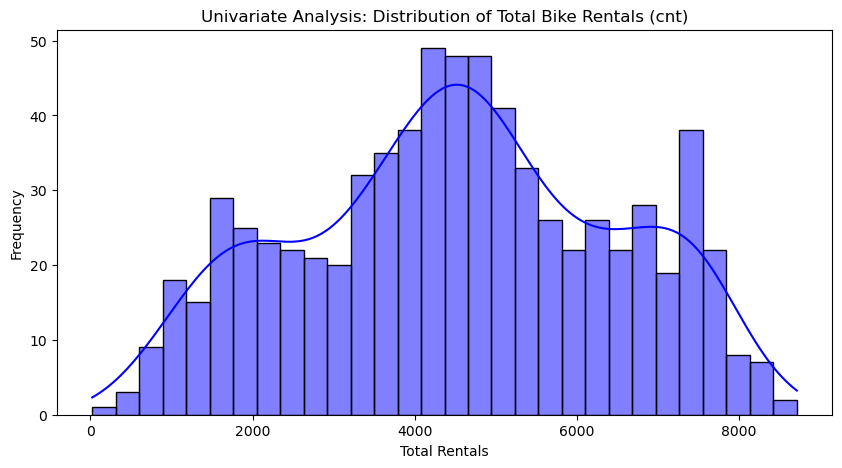

In [61]:
# 3. Exploratory Data Analysis (EDA)
# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(data['cnt'], kde=True, bins=30, color='blue')
plt.title('Univariate Analysis: Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

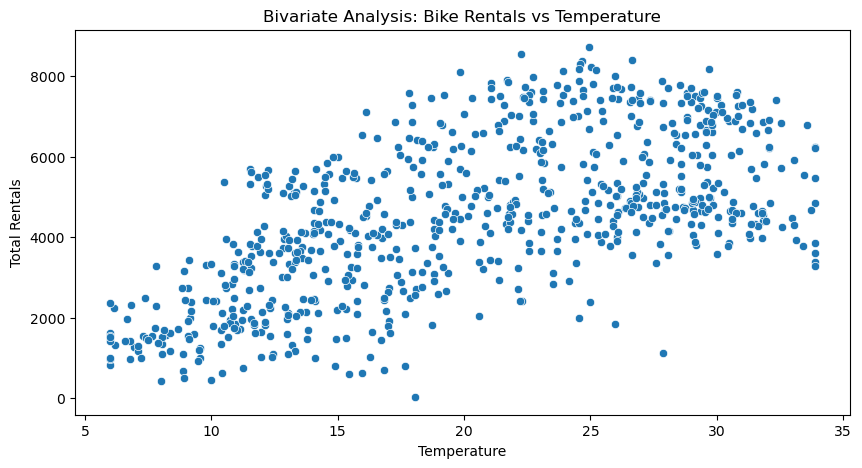

In [65]:
# Bivariate Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['temp'], y=data['cnt'])
plt.title('Bivariate Analysis: Bike Rentals vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.show()

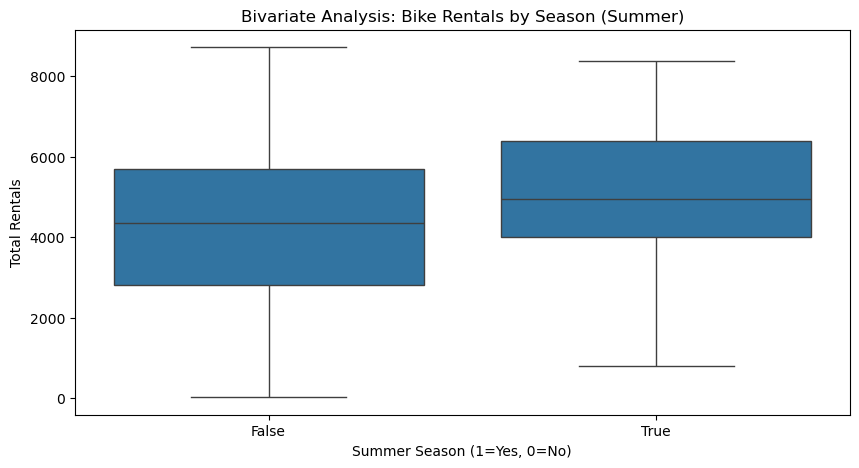

In [69]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['season_Summer'], y=data['cnt'])
plt.title('Bivariate Analysis: Bike Rentals by Season (Summer)')
plt.xlabel('Summer Season (1=Yes, 0=No)')
plt.ylabel('Total Rentals')
plt.show()

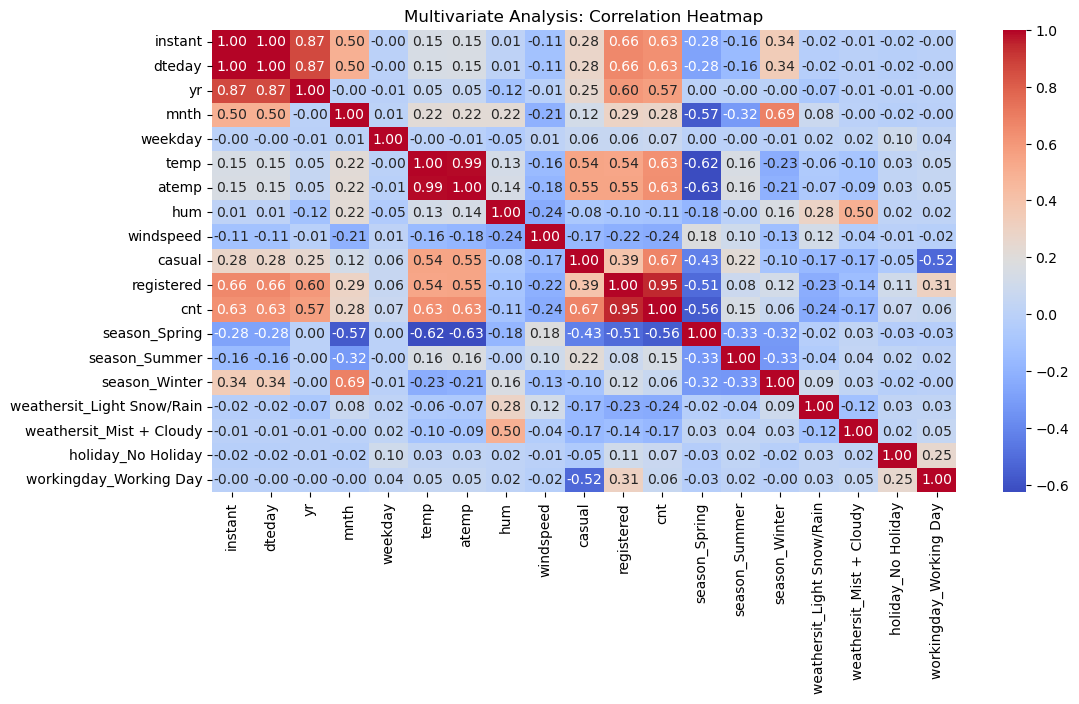

In [73]:
# Multivariate Analysis
plt.figure(figsize=(12,6 ))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Multivariate Analysis: Correlation Heatmap')
plt.show()

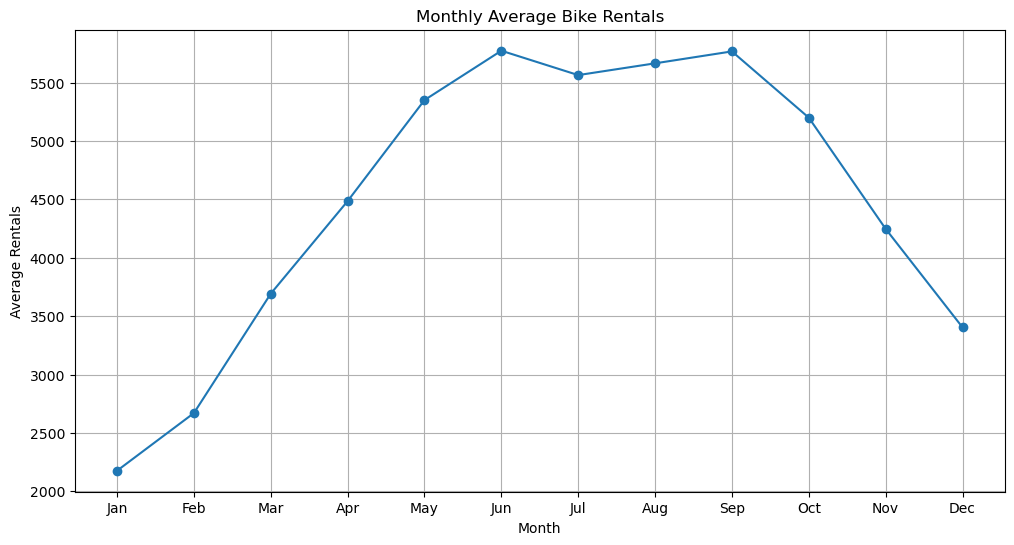

In [75]:
# Additional Visualizations
# Time-based trends
plt.figure(figsize=(12, 6))
data.groupby(data['dteday'].dt.month)['cnt'].mean().plot(kind='line', marker='o')
plt.title('Monthly Average Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

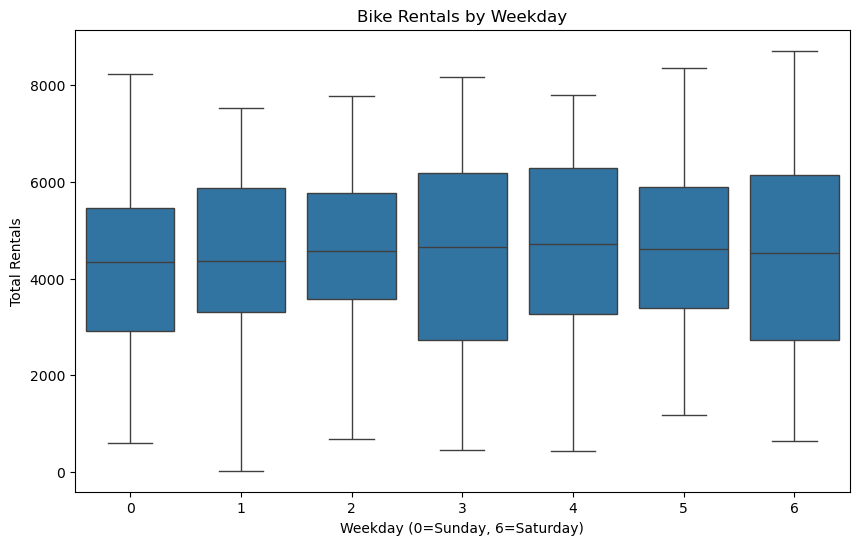

In [77]:
# Rentals by weekday
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['weekday'], y=data['cnt'])
plt.title('Bike Rentals by Weekday')
plt.xlabel('Weekday (0=Sunday, 6=Saturday)')
plt.ylabel('Total Rentals')
plt.show()

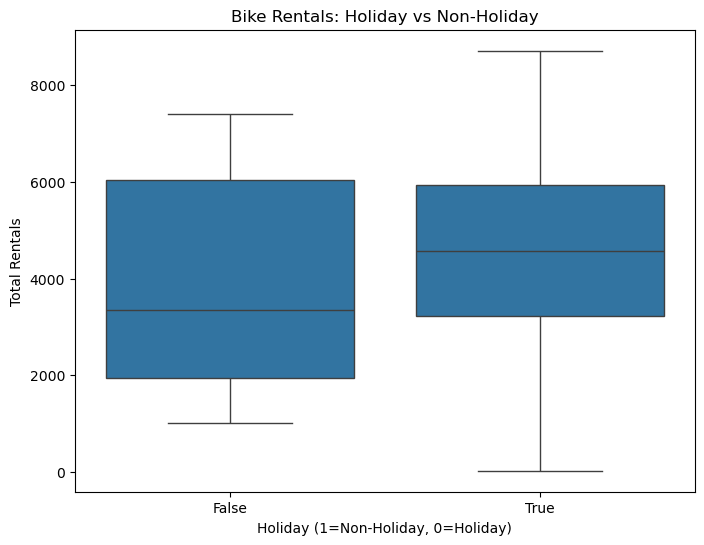

In [79]:
# Rentals on holidays vs non-holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['holiday_No Holiday'], y=data['cnt'])
plt.title('Bike Rentals: Holiday vs Non-Holiday')
plt.xlabel('Holiday (1=Non-Holiday, 0=Holiday)')
plt.ylabel('Total Rentals')
plt.show()

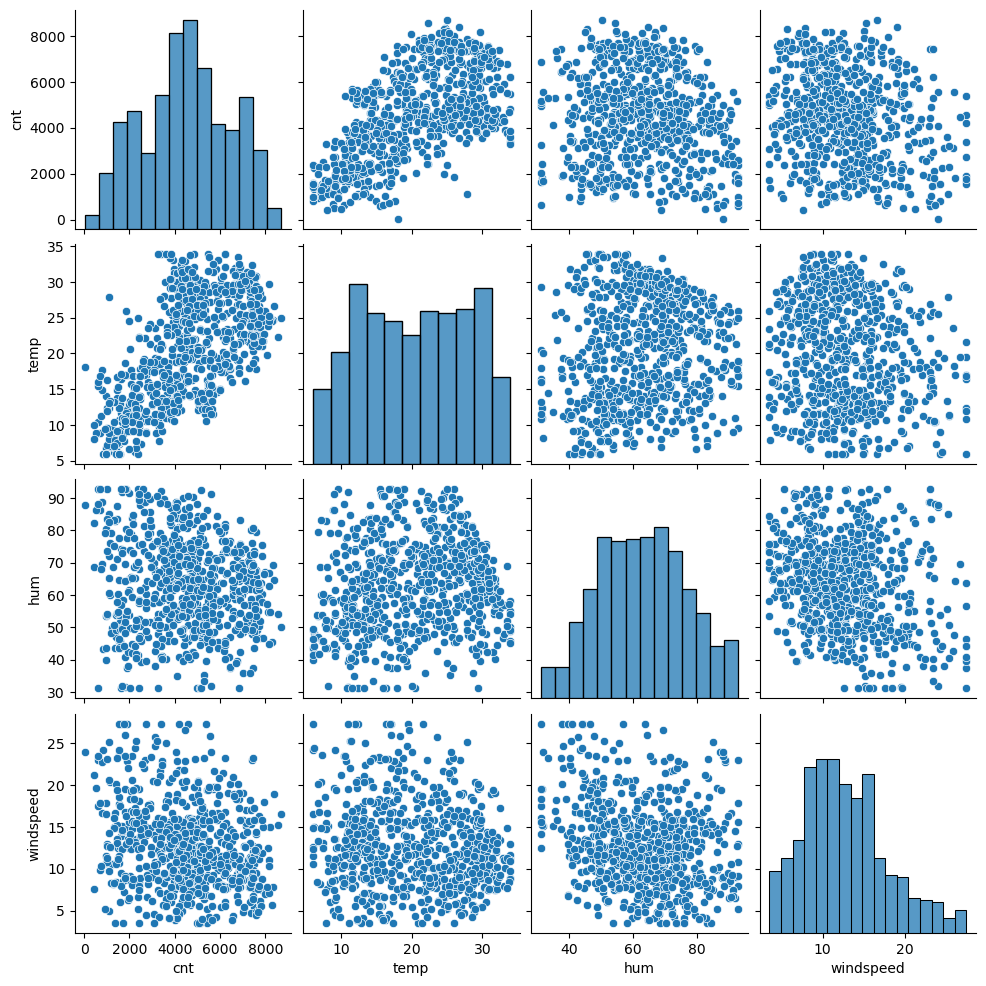

In [81]:
# Pairplot for key numerical features
sns.pairplot(data, vars=['cnt', 'temp', 'hum', 'windspeed'])
plt.show()

In [83]:
# 4. Prepare Data for Modeling
# Define target and features
target = 'cnt'
X = data.drop(columns=['cnt', 'dteday', 'instant', 'casual', 'registered'])
y = data[target]


In [85]:
# Split the data into training and testing sets
split_ratios = {"train": 0.7, "test": 0.2, "validate": 0.1}
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(split_ratios["test"] + split_ratios["validate"]), random_state=42)
X_test, X_validate, y_test, y_validate = train_test_split(X_temp, y_temp, test_size=(split_ratios["validate"] / (split_ratios["test"] + split_ratios["validate"])), random_state=42)

In [87]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validate = scaler.transform(X_validate)

In [89]:
# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [91]:
# Make predictions on the test and validation sets
y_pred_test = model.predict(X_test)
y_pred_validate = model.predict(X_validate)

In [93]:
# Evaluate the model on the test set
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Test Set - R-squared: {r2_test:.2f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}")

Test Set - R-squared: 0.81, RMSE: 829.85, MAE: 601.14


C:\Users\ashmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [95]:
# Evaluate the model on the validation set
r2_validate = r2_score(y_validate, y_pred_validate)
rmse_validate = mean_squared_error(y_validate, y_pred_validate, squared=False)
mae_validate = mean_absolute_error(y_validate, y_pred_validate)
print(f"Validation Set - R-squared: {r2_validate:.2f}, RMSE: {rmse_validate:.2f}, MAE: {mae_validate:.2f}")

Validation Set - R-squared: 0.84, RMSE: 761.88, MAE: 583.43


C:\Users\ashmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


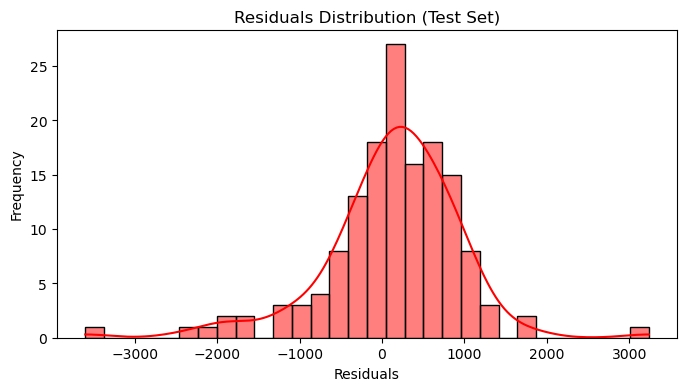

In [113]:
# Residual Analysis on Test Set
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=30, color='red')
plt.title('Residuals Distribution (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [115]:
# Display updated data head after preprocessing
print("\nUpdated Data Head:")
print(data.head())


Updated Data Head:
   instant     dteday  yr  mnth  weekday       temp     atemp      hum  \
0        1 2018-01-01   0     1        6  14.110847  18.18125  80.5833   
1        2 2018-01-02   0     1        0  14.902598  17.68695  69.6087   
2        3 2018-01-03   0     1        1   8.050924   9.47025  43.7273   
3        4 2018-01-04   0     1        2   8.200000  10.60610  59.0435   
4        5 2018-01-05   0     1        3   9.305237  11.46350  43.6957   

   windspeed  casual  registered   cnt  season_Spring  season_Summer  \
0  10.749882     331         654   985           True          False   
1  16.652113     131         670   801           True          False   
2  16.636703     120        1229  1349           True          False   
3  10.739832     108        1454  1562           True          False   
4  12.522300      82        1518  1600           True          False   

   season_Winter  weathersit_Light Snow/Rain  weathersit_Mist + Cloudy  \
0          False            